In [46]:
using Pkg
Pkg.update()

    Updating registry at `~/.julia/registries/General.toml`
   Installed SparseMatrixColorings ─ v0.4.20
  No Changes to `~/.julia/environments/v1.11/Project.toml`
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [0a514795] ↑ SparseMatrixColorings v0.4.19 ⇒ v0.4.20
Precompiling project...
   2239.7 ms  ✓ SparseMatrixColorings
    968.3 ms  ✓ SparseMatrixColorings → SparseMatrixColoringsColorsExt
  2 dependencies successfully precompiled in 3 seconds. 490 already precompiled.
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions. Otherwise, loading dependents of these packages may trigger further precompilation to work with the unexpected versions.


In [47]:
Pkg.add("MAT")
Pkg.add("Glob")
Pkg.add("StatsBase")
Pkg.add("Random")
Pkg.add("MLDataUtils")
Pkg.add("Turing")
Pkg.add("Distributions")
Pkg.add("StatsPlots")
using MAT, Glob, StatsBase, Random, MLDataUtils, Turing, Distributions, StatsPlots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

In [48]:
#sub-MOA101, sub-MOA102, sub-MOA103, sub-MOA104, sub-MOA105, sub-MOA107, sub-MOA108, sub-MOA109, sub-MOA110, sub-MOA111, sub-MOA112,
#sub-MOA113, sub-MOA114, sub-MOA115, sub-MOA116, sub-MOA118, sub-MOA120, sub-MOA121, sub-MOA122, sub-MOA123, sub-MOA124, sub-MOA125,
#sub-MOA126, sub-MOA127, sub-MOA128, sub-MOA130, sub-MOA131, sub-MOA133, sub-MOA134, sub-MOA135

# Depression MADRS Scores 2 days after Ketamine Infusion in subjects with depression
y_ground_truth = ["Medium", "Small", "Negligible", "Big", "Negligible", "Medium", "Small", "Small", "Negligible", "Extreme", "Extreme", 
    "Negligible", "Small", "Negligible", "Medium", "Extreme", "Negligible", "Negligible", "Small", "Negligible", "Negligible", "Negligible",
    "Large", "Medium", "Small", "Small", "Negligible" , "Negligible", "Big", "Negligible"]

# Define the mapping
label_map = Dict(
    "Negligible" => 0,
    "Small"      => 1,
    "Medium"     => 2,
    "Big"        => 3,
    "Large"      => 4,
    "Extreme"    => 5
)

# Convert to numeric categories
y_encoded = [label_map[lbl] for lbl in y_ground_truth]

y = (-0.31, -0.29, 0, -0.59, -0.06, -0.45, 0.24, -0.28, -0.06, -1, -0.86, 0, -0.16, -0.15, -0.35, -0.85, 0, 0.04, 0.23, -0.1, 0.03,0,-0.62,
    -0.38,-0.24,-0.24,0.04,-0.06,-0.51,-0.07,-0.41,1,0,-0.67,-1,-1,-1,0,-1,0,0,0,0,-1,0,1,1,0,0,0.75)


mean_y = mean(y)
var_y  = var(y)   # sample variance by default (divides by n-1)
std_y = sqrt(var_y)

0.4929319197932108

In [49]:
# List of subjects that have some degree of depression
target_subjects = [
    "sub-MOA101", "sub-MOA102", "sub-MOA103", "sub-MOA104", "sub-MOA105", "sub-MOA107", "sub-MOA108", "sub-MOA109", "sub-MOA110", "sub-MOA111",
    "sub-MOA112", "sub-MOA113", "sub-MOA114", "sub-MOA115", "sub-MOA116", "sub-MOA118", "sub-MOA120", "sub-MOA121", "sub-MOA122", "sub-MOA123",
    "sub-MOA124", "sub-MOA125", "sub-MOA126", "sub-MOA127", "sub-MOA128", "sub-MOA130", "sub-MOA131", "sub-MOA133", "sub-MOA134", "sub-MOA135",
    "sub-MOA301", "sub-MOA302", "sub-MOA303", "sub-MOA304", "sub-MOA305", "sub-MOA306", "sub-MOA307", "sub-MOA309", "sub-MOA312", "sub-MOA313",
    "sub-MOA314", "sub-MOA315", "sub-MOA317", "sub-MOA318", "sub-MOA319", "sub-MOA320", "sub-MOA321", "sub-MOA325", "sub-MOA327"]

# Base path to your subject folders
base_path = "Spectral_DCM_Collection_Model1"

# Collect valid file paths
valid_files = String[]

for subj in target_subjects
    subj_path = joinpath(base_path, subj)
    ses_path = joinpath(subj_path, "ses-b0")
    glm_path = joinpath(ses_path, "glm")
    dcm_file = joinpath(glm_path, "Spectral_DCM.mat")

    if !isdir(ses_path)
        @warn "Missing session folder: $ses_path"
    elseif !isfile(dcm_file)
        @warn "Missing Spectral_DCM.mat for $subj"
    else
        push!(valid_files, dcm_file)
    end
end

println("✅ Found Spectral_DCM.mat for $(length(valid_files)) out of $(length(target_subjects)) subjects.")


✅ Found Spectral_DCM.mat for 49 out of 49 subjects.


In [50]:
# Extract A matrix features (e.g., flatten full 4x4)
function extract_features(file)
    mat = matread(file)
    A = mat["DCM"]["Ep"]["A"]  # 4×4 matrix
    A = Matrix(A)              # Convert to regular Julia matrix if needed
    return [A[i, j] for i in 1:4, j in 1:4 if i != j]  # Exclude diagonal
end

extract_features (generic function with 1 method)

In [51]:
# Create feature dataset
X = hcat([extract_features(file) for file in valid_files]...)'

49×12 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.183874     0.200038   -0.25122     …   0.157106     0.0534628
  0.23387      0.129208   -0.115115        0.0480798    0.150714
  0.0996838    0.090809    0.418539        0.0442531    0.0578206
 -0.11233      0.280477    0.0251157       0.271268     0.190152
  0.107477     0.13921     0.176826        0.15949      0.160727
  0.084469     0.279525   -0.33087     …   0.115822     0.164236
  0.0581663    0.0835331   0.7367          0.00257609  -0.0742938
  0.0732204    0.189625    0.179149        0.0611454    0.194037
  0.039347     0.402827    0.274434        0.00906837  -0.0438798
  0.122882     0.390536   -0.130256        0.241984    -0.113679
  0.0909516    0.144003    0.153679    …   0.16696      0.175275
  0.0336722    0.260814    0.052494        0.252516     0.0267886
  0.141889    -0.109678    0.30434         0.221982    -0.0515337
  ⋮                                    ⋱   ⋮           
  0.189649     0.0961754   0.146037    

In [52]:
@show size(X)        # should be (n_samples, n_features)
@show length(y)      # should be n_samples

# Ensure reproducibility
Random.seed!(42)

# Assume: X is a matrix (n_samples × n_features), y is a vector (n_samples)
n_samples = size(X, 1)
idx = shuffle(1:n_samples)

# 80-20 split
n_train = round(Int, 0.8 * n_samples)
train_idx = idx[1:n_train]
test_idx  = idx[n_train+1:end]

# Create splits
X_train = X[train_idx, :]
y_train = y[train_idx]

X_test  = X[test_idx, :]
y_test  = y[test_idx]

size(X) = (49, 12)
length(y) = 50


(-0.07, 0.23, 0.24, -0.15, -1, -0.06, -0.41, 0, 0, 1)

In [53]:
using LinearAlgebra
Pkg.add("StatsFuns")
using StatsFuns

@model function bayesian_linear_regression(X, y)
    n, d = size(X)

    # Priors
    w ~ MvNormal(zeros(d), 1.0)     # weight prior
    b ~ Normal(0, 0.5)               # bias prior
    σ ~ Normal(0, 0.5)  # positive noise scale

    # Likelihood
    mu = X * w .+ b
    y ~ MvNormal(mu, σ)
end

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


bayesian_linear_regression (generic function with 2 methods)

In [54]:
X_train_std = (X_train .- mean(X_train, dims=1)) ./ std(X_train, dims=1)
y_train = collect(y_train)

X_test_std = (X_test .- mean(X_test, dims=1)) ./ std(X_test, dims=1)
y_test = collect(y_test)

10-element Vector{Real}:
 -0.07
  0.23
  0.24
 -0.15
 -1
 -0.06
 -0.41
  0
  0
  1

In [55]:
Random.seed!(42)
model = bayesian_linear_regression(X_train_std, y_train)
chain = sample(model, NUTS(0.90), 10000; chains=4)

┌ Info: Found initial step size
└   ϵ = 0.000390625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07


Chains MCMC chain (10000×26×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 8.18 seconds
Compute duration  = 8.18 seconds
parameters        = w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9], w[10], w[11], w[12], b, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse     ess_bulk    ess_tail      rhat  ⋯
      Symbol   Float64   Float64   Float64      Float64     Float64   Float64  ⋯

        w[1]   -0.0933    0.4254    0.0051    6830.9472   6299.4399    1.0001  ⋯
        w[2]    0.1574    0.2411    0.0035    4857.7656   6613.7760    0.9999  ⋯
        w[3]    0.5150    0.2640    0.0034    6005.8540   6724.7246    1.0000  ⋯
        w[4]    0.1535    0.4079    0.0048    7105.2409   7004.8372    1

In [56]:
function predict_blr(chain, X_test_std)
    d = 12
    n_samples = length(chain[:b])
    n_test = size(X_test_std, 1)

    # Get weight matrix: (n_samples × d)
    w_matrix = hcat([chain[Symbol("w[$i]")] for i in 1:d]...)

    # Bias vector: (n_samples,)
    b_vec = chain[:b]

    # Predict: (n_test × n_samples)
    preds = X_test_std * w_matrix' .+ b_vec'  # Transpose bias to match rows

    # Posterior mean and std across samples
    y_mean = mean(preds, dims=2)
    y_std = std(preds, dims=2)
    return vec(y_mean), vec(y_std)
end

predict_blr (generic function with 1 method)

In [57]:
y_pred_mean, y_pred_std = predict_blr(chain, X_test_std)

([-0.43843939813911337, -0.42631691732100135, 0.2967783700131969, -0.28264579690542707, -0.27947022160050083, -0.1985467706174162, -0.5639679786212382, -0.20076066761788852, -0.16344285904232347, -0.21529801137506538], [0.3898529102159275, 0.4437723375699703, 0.4108900307131476, 0.3583159676997579, 0.19275165516151277, 0.1970697643508799, 0.5610011398851825, 0.24871908841331433, 0.25403394945989005, 0.3003876114836317])

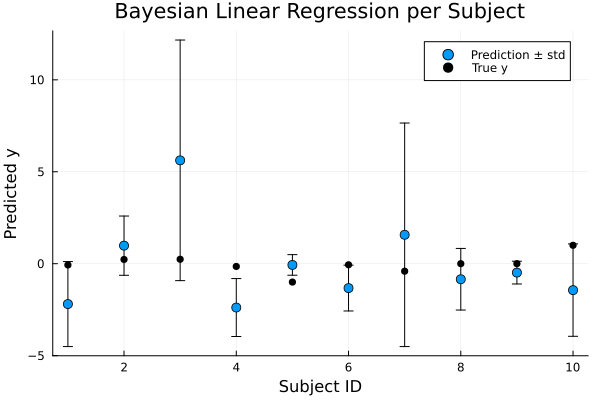

In [117]:
using Plots

n_subjects = length(y_pred_mean)
subject_ids = 1:n_subjects  # X-axis: Subject index (1 to 30)

scatter(
    subject_ids,
    collect(y_pred_mean),
    yerror=collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression per Subject",
    label = "Prediction ± std",
    legend = :topright,
    markersize = 5
)
# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)


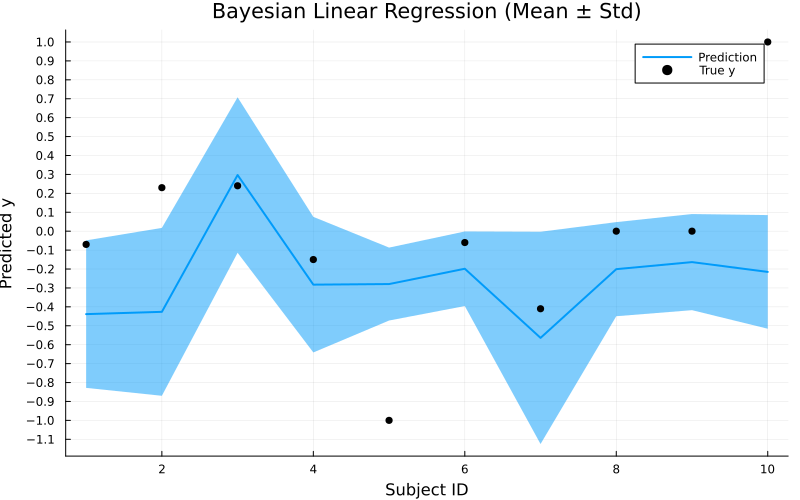

In [59]:
# Plot predicted mean with ± std ribbon
plot(
    subject_ids,
    collect(y_pred_mean),
    ribbon = collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression (Mean ± Std)",
    label = "Prediction",
    linewidth = 2,
    legend = :topright,
    size = (800, 500)  # ⬅️ increased size for better y-axis resolution
)

# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

# Set y-axis ticks at 0.1 intervals
ymin = floor(minimum(vcat(y_train, y_pred_mean)), digits=1) - 0.1
ymax = ceil(maximum(vcat(y_train, y_pred_mean)), digits=1) + 0.1
yticks = ymin:0.1:ymax
plot!(yticks = yticks)

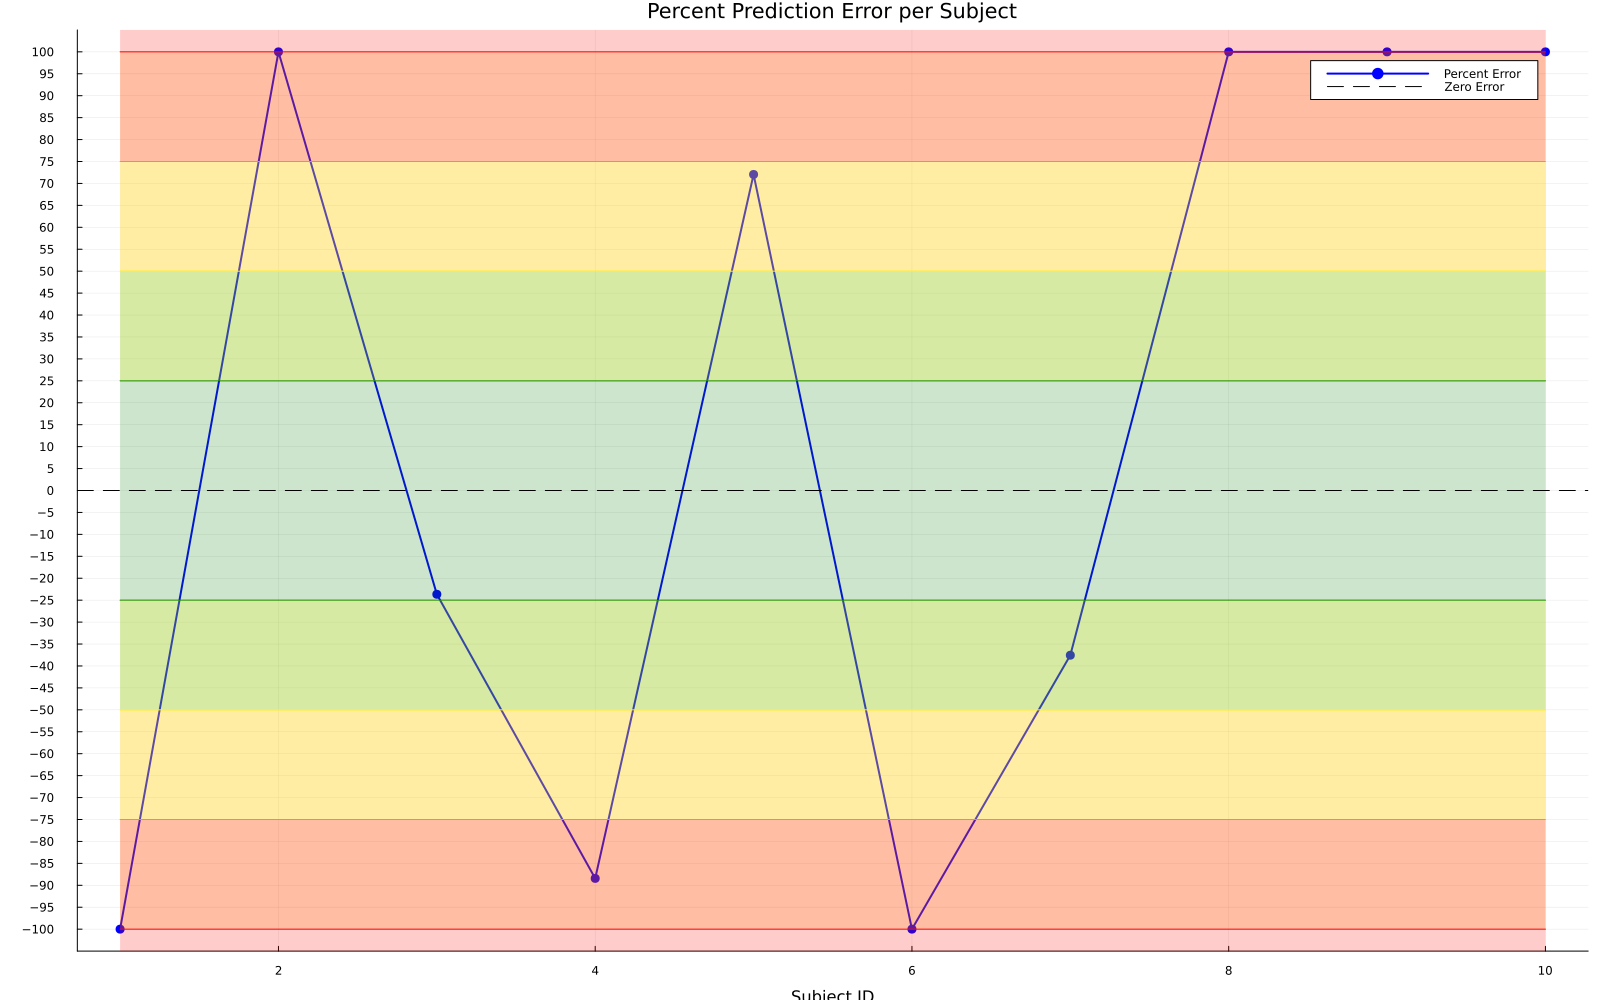

In [60]:
# Step 1: Calculate percent error and cap to ±100%
raw_errors = (collect(y_test) .- collect(y_pred_mean)) ./ (collect(y_test) .+ eps()) .* 100
residuals = clamp.(raw_errors, -100, 100)  # Cap to ±100%
subject_ids = 1:length(residuals)

# Step 2: Define band edges and matching colors
band_edges = [0, 25, 50, 75, 100]
band_colors = [:green, :yellow, :orange, :red, :purple]

# Step 3: Plot the percent error as a line with markers
plot(
    subject_ids,
    residuals,
    seriestype = :line,
    xlabel = "Subject ID",
    ylabel = "Percent Error (%)",
    title = "Percent Prediction Error per Subject",
    label = "Percent Error",
    legend = :topright,
    color = :blue,
    linewidth = 2,
    markershape = :circle,
    markersize = 5,
    markerstrokewidth = 0,
    size = (1600, 1000),
    ylim = (-105, 105),         # Ensure visibility for ±100% bands
    yticks = -100:5:100         # Y-axis ticks every 5%
)

# Step 4: Add symmetrical error bands
for i in 1:(length(band_edges)-1)
    lo, hi = band_edges[i], band_edges[i+1]
    color = band_colors[i]
    band_x = [1, length(residuals)]

    # Upper band
    plot!(
        band_x,
        fill(hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )

    # Lower mirrored band
    plot!(
        band_x,
        fill(-hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )
end

# Step 5: Add horizontal zero-error line
hline!([0], linestyle = :dash, color = :black, label = "Zero Error")

In [61]:
@model function bayesian_quadratic_model(X, y)
    n, d = size(X)

    # Linear and quadratic weights
    w       ~ MvNormal(zeros(d), 1.0)      # linear
    w_quad  ~ MvNormal(zeros(d), 1.0)      # quadratic
    b       ~ Normal(0, 1)
    σ       ~ truncated(Normal(0, 0.5), 0, Inf)

    for i in 1:n
        x_i = X[i, :]
        x2_i = x_i .^ 2  # elementwise square
        mu = dot(w, x_i) + dot(w_quad, x2_i) + b
        y[i] ~ Normal(mu, σ)
    end
end

bayesian_quadratic_model (generic function with 2 methods)

In [63]:
model = bayesian_quadratic_model(X_train_std, y_train)
chain = sample(model, NUTS(0.90), 10000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:47


Chains MCMC chain (10000×38×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 47.74 seconds
Compute duration  = 47.74 seconds
parameters        = w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9], w[10], w[11], w[12], w_quad[1], w_quad[2], w_quad[3], w_quad[4], w_quad[5], w_quad[6], w_quad[7], w_quad[8], w_quad[9], w_quad[10], w_quad[11], w_quad[12], b, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

        w[1]    0.1759    0.6312    0.0080   6239.1351   6828.6927    1.0000   ⋯
        w[2]    0.4784    0.3581    0.0052   4807.8912   6125.2875    1.0002   ⋯
        w[3]    

In [64]:
function predict_quadratic(chain, X)
    d = size(X, 2)
    n_samples = length(chain[:b])
    n_test = size(X, 1)

    # Extract weights: shape (n_samples, d)
    w      = hcat([chain[Symbol("w[$i]")] for i in 1:d]...)
    w_quad = hcat([chain[Symbol("w_quad[$i]")] for i in 1:d]...)
    b      = chain[:b]

    preds = zeros(n_test, n_samples)
    for i in 1:n_samples
        ŷ = X * w[i, :] .+ X.^2 * w_quad[i, :] .+ b[i]  # ✅ fixed dot products
        preds[:, i] = ŷ
    end

    y_mean = mean(preds, dims=2)
    y_std = std(preds, dims=2)
    return vec(y_mean), vec(y_std)
end


predict_quadratic (generic function with 1 method)

In [65]:
y_pred_mean, y_pred_std = predict_quadratic(chain, X_test_std)


([-0.6612924660093924, -0.3173909572343175, 0.7467493161882514, -0.13569024654012168, -0.2271543227005015, -0.15738303121253971, -0.2643333567067282, -0.5436130001381267, -0.4383032261708375, -0.6477856459878765], [0.7168213363348802, 0.6386432510063266, 0.6840418679905281, 0.6490546768713082, 0.3126730067719219, 0.3914498740039976, 0.9840012054787912, 0.4161987084410384, 0.2854600408976362, 0.6415710126838806])

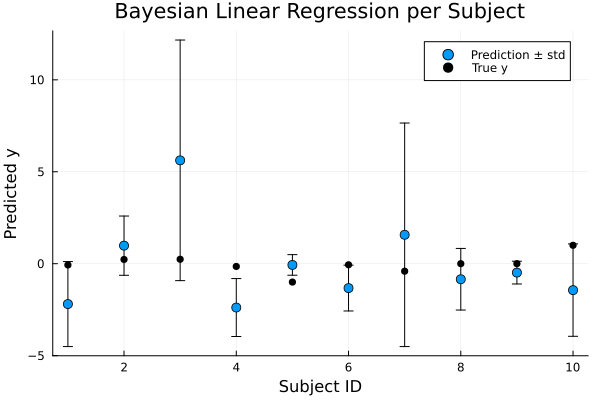

In [116]:
scatter(
    subject_ids,
    collect(y_pred_mean),
    yerror=collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression per Subject",
    label = "Prediction ± std",
    legend = :topright,
    markersize = 5
)
# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

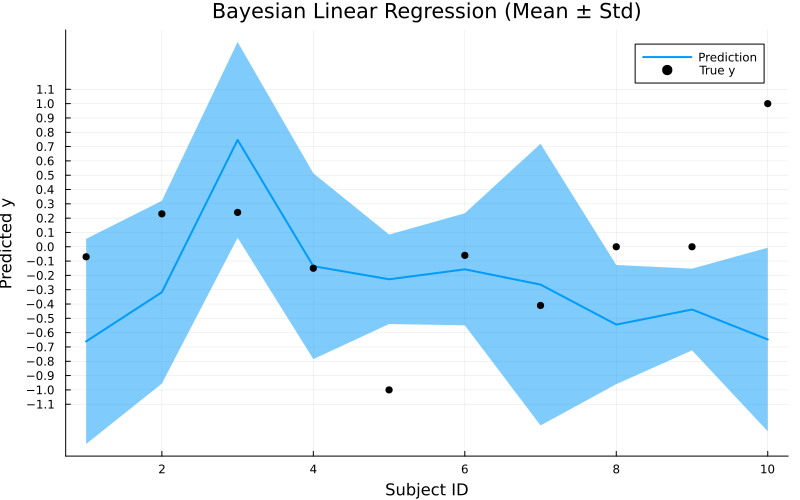

In [67]:
# Plot predicted mean with ± std ribbon
plot(
    subject_ids,
    collect(y_pred_mean),
    ribbon = collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression (Mean ± Std)",
    label = "Prediction",
    linewidth = 2,
    legend = :topright,
    size = (800, 500)  # ⬅️ increased size for better y-axis resolution
)

# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

# Set y-axis ticks at 0.1 intervals
ymin = floor(minimum(vcat(y_train, y_pred_mean)), digits=1) - 0.1
ymax = ceil(maximum(vcat(y_train, y_pred_mean)), digits=1) + 0.1
yticks = ymin:0.1:ymax
plot!(yticks = yticks)

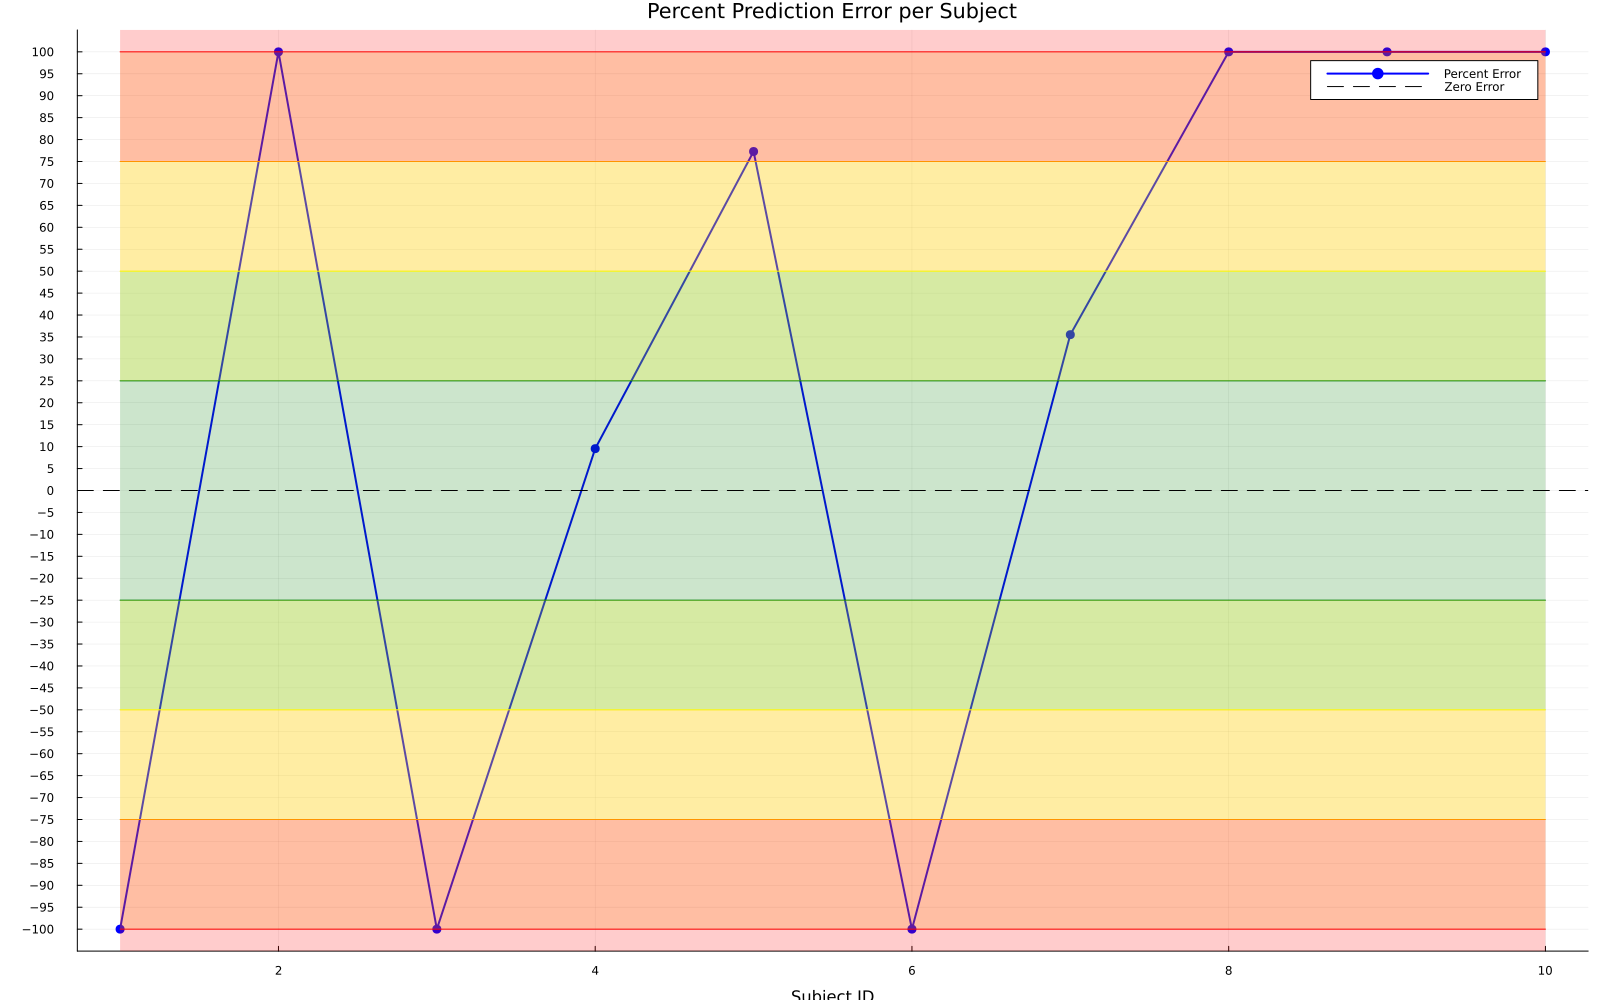

In [68]:
# Step 1: Calculate percent error and cap to ±100%
raw_errors = (collect(y_test) .- collect(y_pred_mean)) ./ (collect(y_test) .+ eps()) .* 100
residuals = clamp.(raw_errors, -100, 100)  # Cap to ±100%
subject_ids = 1:length(residuals)

# Step 2: Define band edges and matching colors
band_edges = [0, 25, 50, 75, 100]
band_colors = [:green, :yellow, :orange, :red, :purple]

# Step 3: Plot the percent error as a line with markers
plot(
    subject_ids,
    residuals,
    seriestype = :line,
    xlabel = "Subject ID",
    ylabel = "Percent Error (%)",
    title = "Percent Prediction Error per Subject",
    label = "Percent Error",
    legend = :topright,
    color = :blue,
    linewidth = 2,
    markershape = :circle,
    markersize = 5,
    markerstrokewidth = 0,
    size = (1600, 1000),
    ylim = (-105, 105),         # Ensure visibility for ±100% bands
    yticks = -100:5:100         # Y-axis ticks every 5%
)

# Step 4: Add symmetrical error bands
for i in 1:(length(band_edges)-1)
    lo, hi = band_edges[i], band_edges[i+1]
    color = band_colors[i]
    band_x = [1, length(residuals)]

    # Upper band
    plot!(
        band_x,
        fill(hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )

    # Lower mirrored band
    plot!(
        band_x,
        fill(-hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )
end

# Step 5: Add horizontal zero-error line
hline!([0], linestyle = :dash, color = :black, label = "Zero Error")

In [69]:
@model function bayesian_cubic_model(X, y)
    n, d = size(X)

    # Priors for linear, quadratic, cubic terms
    w       ~ MvNormal(zeros(d), 1.0)       # linear
    w_quad  ~ MvNormal(zeros(d), 1.0)       # quadratic
    w_cubic ~ MvNormal(zeros(d), 1.0)       # cubic
    b       ~ Normal(0, 10)
    σ       ~ truncated(Normal(0, 1), 0, Inf)

    for i in 1:n
        x_i = X[i, :]
        mu = dot(w, x_i) +
             dot(w_quad, x_i .^ 2) +
             dot(w_cubic, x_i .^ 3) + b
        y[i] ~ Normal(mu, σ)
    end
end

bayesian_cubic_model (generic function with 2 methods)

In [70]:
model = bayesian_cubic_model(X_train_std, y_train)
chain = sample(model, NUTS(0.9), 10000)

┌ Info: Found initial step size
└   ϵ = 0.003125
Sampling: 100%|█████████████████████████████████████████| Time: 0:04:09


Chains MCMC chain (10000×50×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 251.24 seconds
Compute duration  = 251.24 seconds
parameters        = w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9], w[10], w[11], w[12], w_quad[1], w_quad[2], w_quad[3], w_quad[4], w_quad[5], w_quad[6], w_quad[7], w_quad[8], w_quad[9], w_quad[10], w_quad[11], w_quad[12], w_cubic[1], w_cubic[2], w_cubic[3], w_cubic[4], w_cubic[5], w_cubic[6], w_cubic[7], w_cubic[8], w_cubic[9], w_cubic[10], w_cubic[11], w_cubic[12], b, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse     ess_bulk    ess_tail      rhat  ⋯
      Symbol   Float64   Float64   Float64      Float64     Float64   Float64  ⋯

        w[1]   -0.0785    0.7

In [71]:
function predict_cubic(chain, X)
    d = size(X, 2)
    n_samples = length(chain[:b])
    n_test = size(X, 1)

    w       = hcat([chain[Symbol("w[$i]")] for i in 1:d]...)
    w_quad  = hcat([chain[Symbol("w_quad[$i]")] for i in 1:d]...)
    w_cubic = hcat([chain[Symbol("w_cubic[$i]")] for i in 1:d]...)
    b       = chain[:b]

    preds = zeros(n_test, n_samples)
    for i in 1:n_samples
        ŷ = X * w[i, :] .+
             (X .^ 2) * w_quad[i, :] .+
             (X .^ 3) * w_cubic[i, :] .+
             b[i]
        preds[:, i] = ŷ
    end

    y_mean = mean(preds, dims=2)
    y_std  = std(preds, dims=2)
    return vec(y_mean), vec(y_std)
end

predict_cubic (generic function with 1 method)

In [72]:
y_pred_mean, y_pred_std = predict_cubic(chain, X_test_std)

([0.7421254350581623, -0.5923776923580425, 1.9941846620228334, -0.06953761149074231, -0.41119609364272436, 0.10695493478749209, 2.3596078719633757, -0.37763454240952166, -0.8171618193800314, -0.7229565245373281], [1.318463428348873, 0.887040912462956, 3.0126049941568787, 1.1107081119472955, 0.47678714864970645, 0.6928004273303199, 2.7297842910528525, 0.8628491670159326, 0.4370064291490942, 1.6356927654590458])

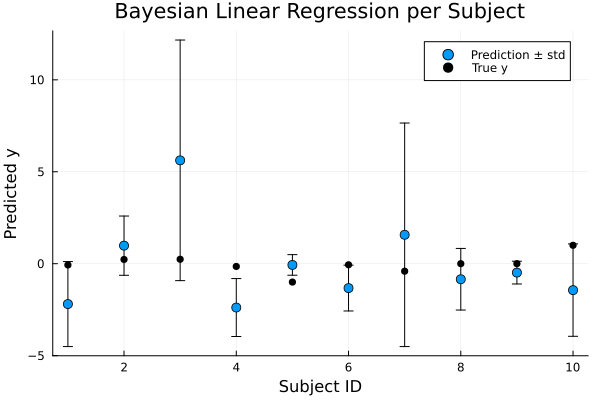

In [114]:
scatter(
    subject_ids,
    collect(y_pred_mean),
    yerror=collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression per Subject",
    label = "Prediction ± std",
    legend = :topright,
    markersize = 5
)
# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

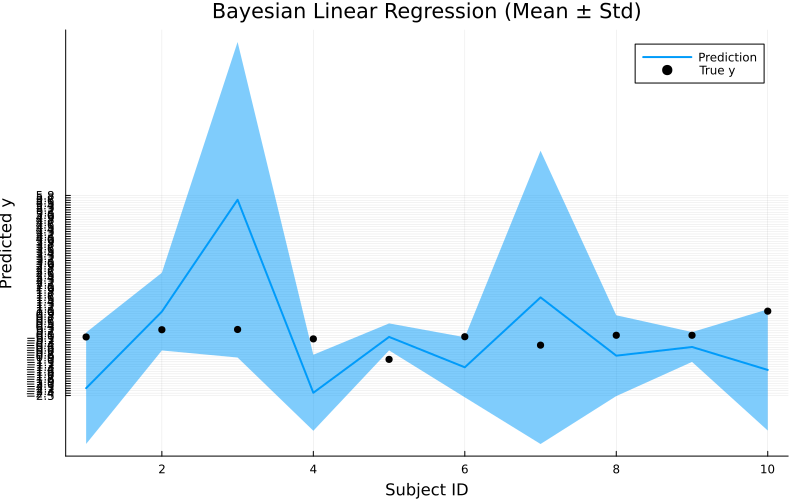

In [115]:
# Plot predicted mean with ± std ribbon
plot(
    subject_ids,
    collect(y_pred_mean),
    ribbon = collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression (Mean ± Std)",
    label = "Prediction",
    linewidth = 2,
    legend = :topright,
    size = (800, 500)  # ⬅️ increased size for better y-axis resolution
)

# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

# Set y-axis ticks at 0.1 intervals
ymin = floor(minimum(vcat(y_train, y_pred_mean)), digits=1) - 0.1
ymax = ceil(maximum(vcat(y_train, y_pred_mean)), digits=1) + 0.1
yticks = ymin:0.1:ymax
plot!(yticks = yticks)

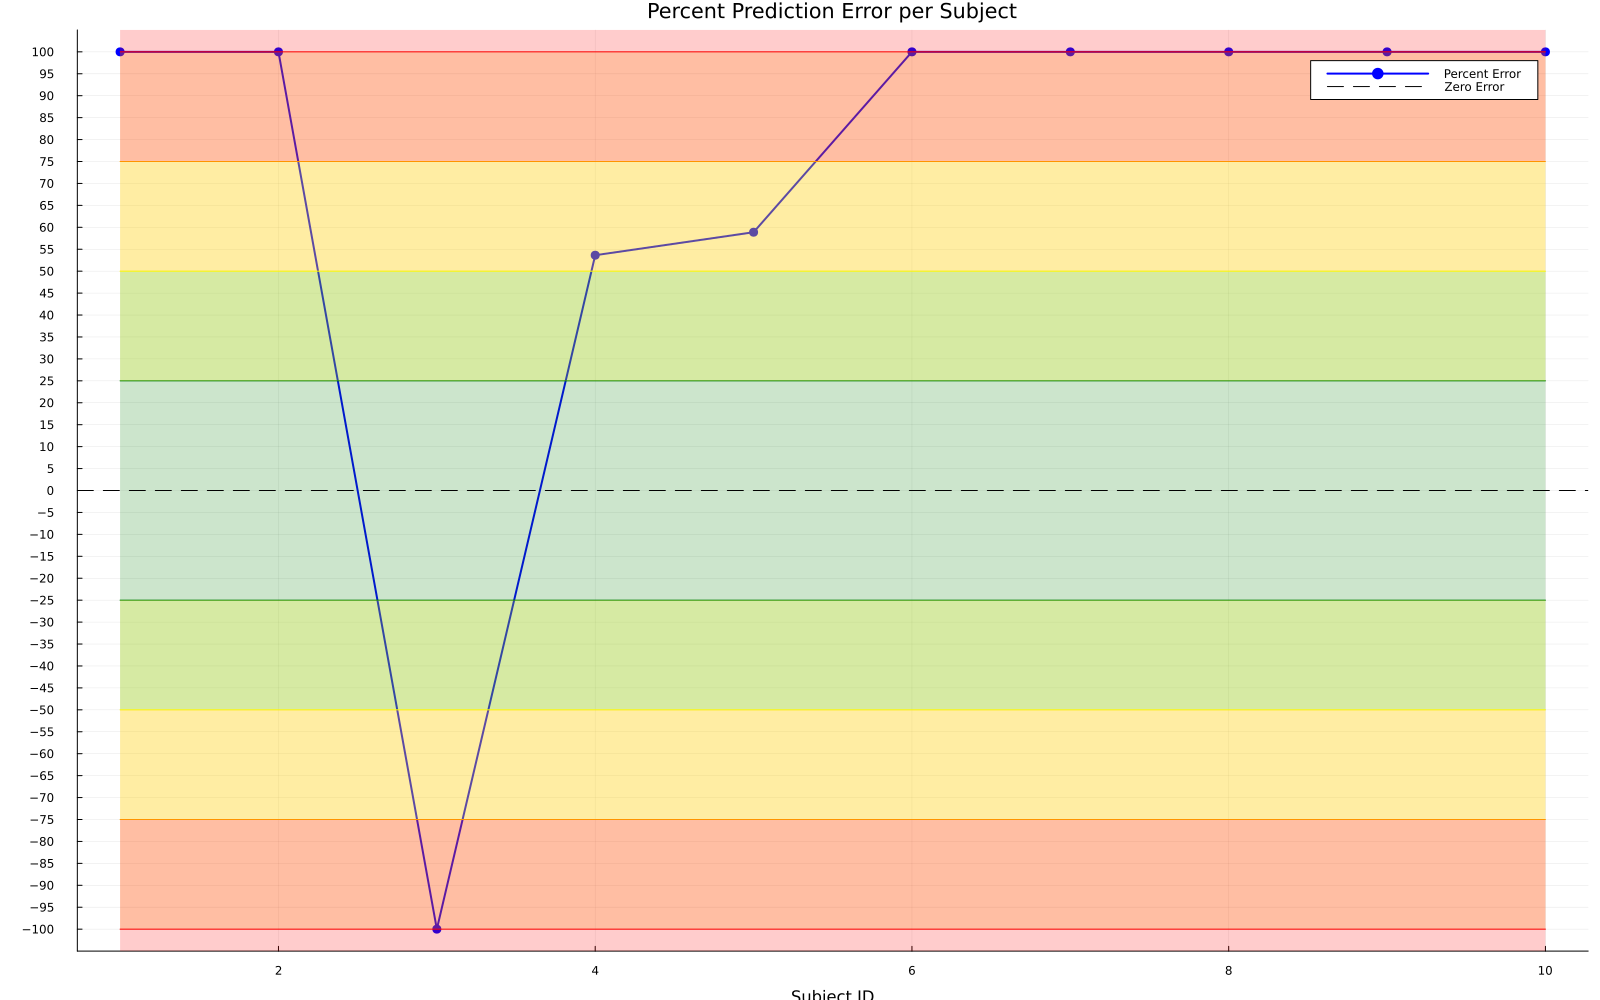

In [75]:
# Step 1: Calculate percent error and cap to ±100%
raw_errors = (collect(y_test) .- collect(y_pred_mean)) ./ (collect(y_test) .+ eps()) .* 100
residuals = clamp.(raw_errors, -100, 100)  # Cap to ±100%
subject_ids = 1:length(residuals)

# Step 2: Define band edges and matching colors
band_edges = [0, 25, 50, 75, 100]
band_colors = [:green, :yellow, :orange, :red, :purple]

# Step 3: Plot the percent error as a line with markers
plot(
    subject_ids,
    residuals,
    seriestype = :line,
    xlabel = "Subject ID",
    ylabel = "Percent Error (%)",
    title = "Percent Prediction Error per Subject",
    label = "Percent Error",
    legend = :topright,
    color = :blue,
    linewidth = 2,
    markershape = :circle,
    markersize = 5,
    markerstrokewidth = 0,
    size = (1600, 1000),
    ylim = (-105, 105),         # Ensure visibility for ±100% bands
    yticks = -100:5:100         # Y-axis ticks every 5%
)

# Step 4: Add symmetrical error bands
for i in 1:(length(band_edges)-1)
    lo, hi = band_edges[i], band_edges[i+1]
    color = band_colors[i]
    band_x = [1, length(residuals)]

    # Upper band
    plot!(
        band_x,
        fill(hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )

    # Lower mirrored band
    plot!(
        band_x,
        fill(-hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )
end

# Step 5: Add horizontal zero-error line
hline!([0], linestyle = :dash, color = :black, label = "Zero Error")

In [76]:
mean_model_var = mean(y_pred_std .^ 2)
println("Global variance in y: ", var_y)
println("Average predictive variance: ", mean_model_var)

mean_model_std = mean(y_pred_std)
println("Global std dev in y: ", std_y)
println("Average predictive std dev: ", mean_model_std)

median_model_var = median(y_pred_std .^ 2)
println("Median Global variance in y: ", median(var_y))
println("Median predictive variance: ", median_model_var)

median_model_std = median(y_pred_std)
println("Median Global std dev in y: ", median(std_y))
println("Median predictive std dev: ", median_model_std)

Global variance in y: 0.2429818775510204
Average predictive variance: 2.460464357305938
Global std dev in y: 0.4929319197932108
Average predictive std dev: 1.3163737675572953
Median Global variance in y: 0.2429818775510204
Median predictive variance: 1.0102570451643198
Median Global std dev in y: 0.4929319197932108
Median predictive std dev: 0.9988745122051257


In [77]:
@model function bayesian_polynomial_model(X, y, p::Int)
    n, d = size(X)

    # Explicitly declare each weights[k] ~ MvNormal
    weights = Vector{Vector{Real}}(undef, p)
    for k in 1:p
        weights[k] ~ MvNormal(zeros(d), 1.0)
    end

    b ~ Normal(0, 10)
    σ ~ truncated(Normal(0, 1), 0, Inf)

    for i in 1:n
        x_i = X[i, :]
        mu = b
        for k in 1:p
            mu += dot(weights[k], x_i .^ k)
        end
        y[i] ~ Normal(mu, σ)
    end
end

bayesian_polynomial_model (generic function with 2 methods)

In [84]:
p = 4  # 4th order
model = bayesian_polynomial_model(X_train_std, y_train, p)
chain = sample(model, NUTS(0.9), 1000)

┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:03:16


Chains MCMC chain (1000×62×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 196.56 seconds
Compute duration  = 196.56 seconds
parameters        = weights[1][1], weights[1][2], weights[1][3], weights[1][4], weights[1][5], weights[1][6], weights[1][7], weights[1][8], weights[1][9], weights[1][10], weights[1][11], weights[1][12], weights[2][1], weights[2][2], weights[2][3], weights[2][4], weights[2][5], weights[2][6], weights[2][7], weights[2][8], weights[2][9], weights[2][10], weights[2][11], weights[2][12], weights[3][1], weights[3][2], weights[3][3], weights[3][4], weights[3][5], weights[3][6], weights[3][7], weights[3][8], weights[3][9], weights[3][10], weights[3][11], weights[3][12], weights[4][1], weights[4][2], weights[4][3], weights[4][4], weights[4][5], weights[4][6], weights[4][7], weights[4][8], weights[4][9], weights[4][10], weights[4][11], weights[4][12], b, σ
internals         = lp, n_steps, is_accept, a

In [85]:
function predict_polynomial(chain, X, p::Int)
    d = size(X, 2)
    n_samples = length(chain[:b])
    n_test = size(X, 1)
    preds = zeros(n_test, n_samples)

    for i in 1:n_samples
        mu = zeros(n_test)
        for k in 1:p
            w_k = hcat([chain[Symbol("weights[$k][$j]")] for j in 1:d]...)
            mu .+= (X .^ k) * w_k[i, :]
        end
        mu .+= chain[:b][i]
        preds[:, i] = mu
    end

    y_mean = mean(preds, dims=2)
    y_std = std(preds, dims=2)
    return vec(y_mean), vec(y_std)
end

predict_polynomial (generic function with 1 method)

In [86]:
y_pred_mean, y_pred_std = predict_polynomial(chain, X_test_std, 4)

([-2.1948193767650017, 0.9813743187538025, 5.619888016993113, -2.384760034699073, -0.06815454594528289, -1.3277701328565281, 1.5709972681818323, -0.8463783547996926, -0.4857006129703176, -1.4374863314951472], [2.3116156450299084, 1.6120596519662895, 6.5430092713225605, 1.5763853267116275, 0.5597168113384238, 1.2453775453887699, 6.080895983652757, 1.6747333737791552, 0.6188883698467712, 2.513589972159856])

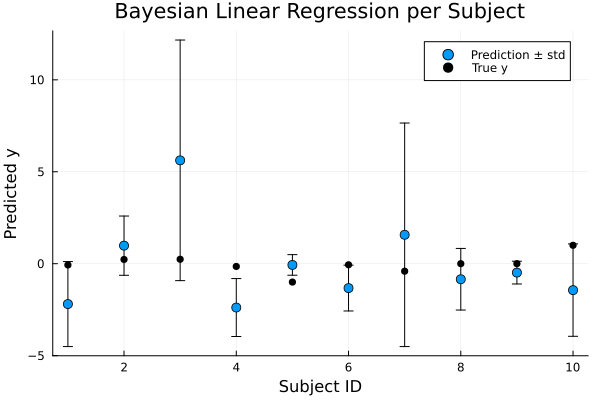

In [113]:
scatter(
    subject_ids,
    collect(y_pred_mean),
    yerror=collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression per Subject",
    label = "Prediction ± std",
    legend = :topright,
    markersize = 5
)

# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

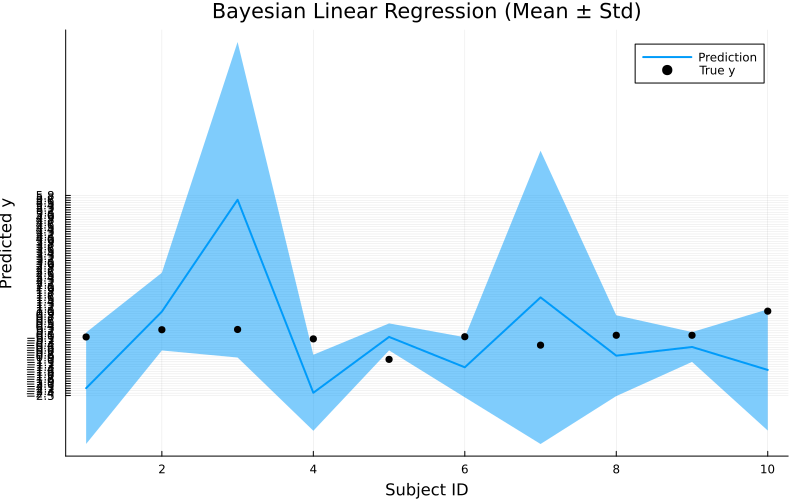

In [88]:
# Plot predicted mean with ± std ribbon
plot(
    subject_ids,
    collect(y_pred_mean),
    ribbon = collect(y_pred_std),
    xlabel = "Subject ID",
    ylabel = "Predicted y",
    title = "Bayesian Linear Regression (Mean ± Std)",
    label = "Prediction",
    linewidth = 2,
    legend = :topright,
    size = (800, 500)  # ⬅️ increased size for better y-axis resolution
)

# Overlay true y values
scatter!(
    subject_ids,
    collect(y_test),
    label = "True y",
    color = :black,
    markersize = 4
)

# Set y-axis ticks at 0.1 intervals
ymin = floor(minimum(vcat(y_train, y_pred_mean)), digits=1) - 0.1
ymax = ceil(maximum(vcat(y_train, y_pred_mean)), digits=1) + 0.1
yticks = ymin:0.1:ymax
plot!(yticks = yticks)

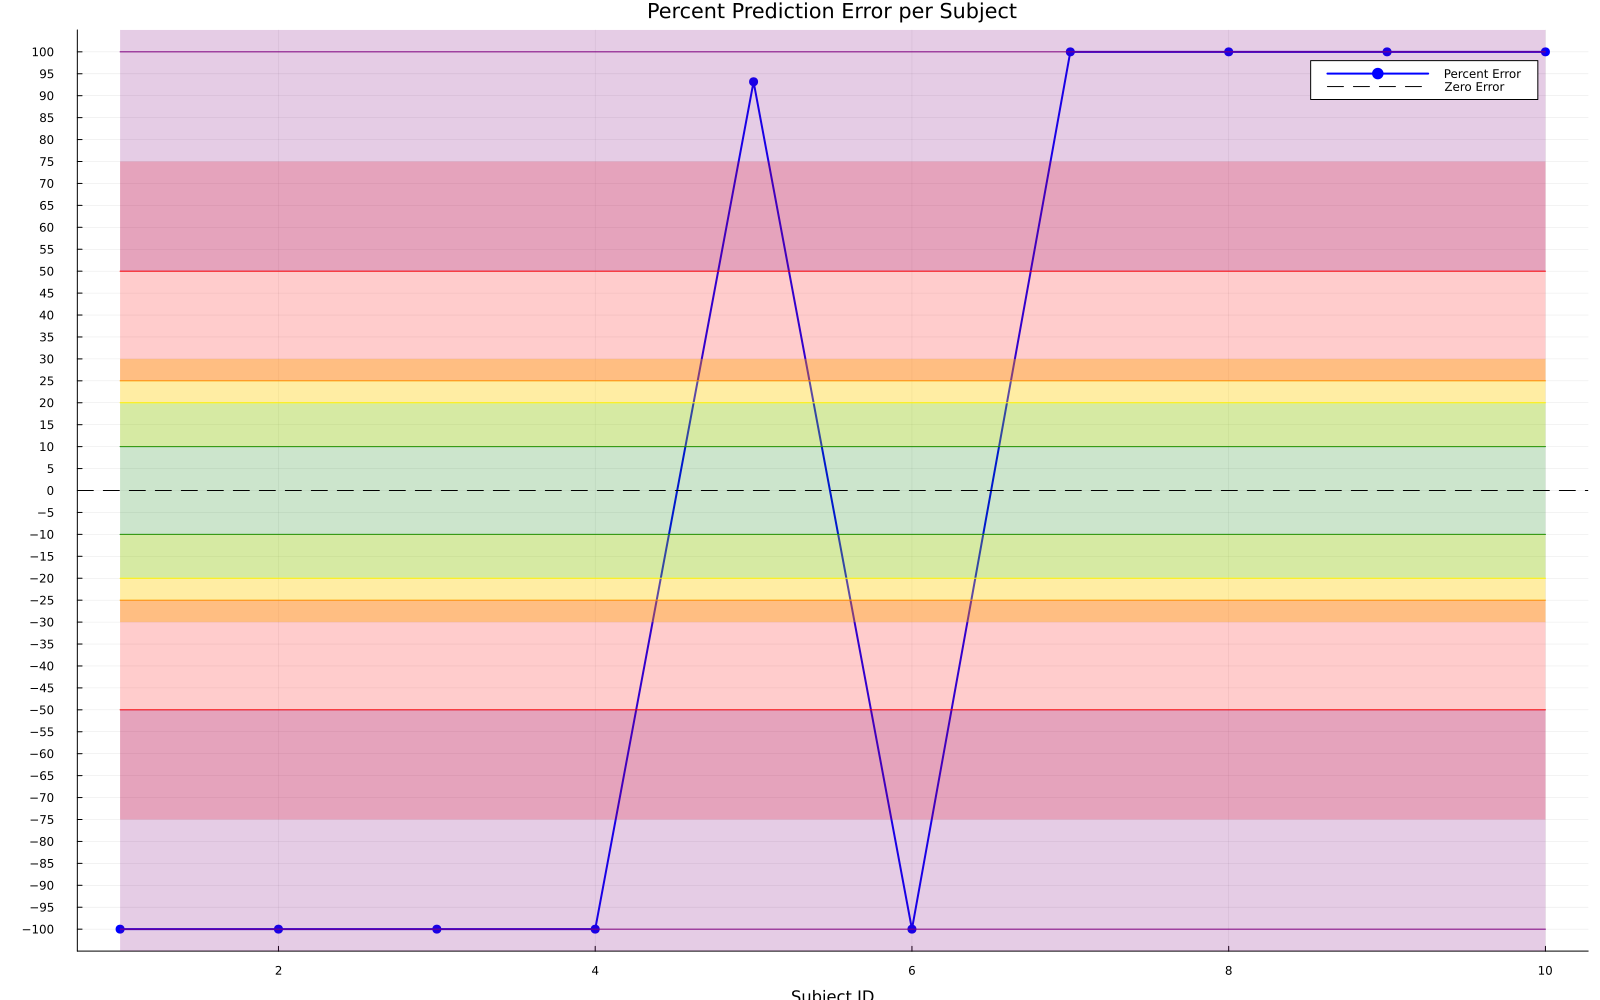

In [89]:
# Step 1: Calculate percent error and cap to ±100%
raw_errors = (collect(y_test) .- collect(y_pred_mean)) ./ (collect(y_test) .+ eps()) .* 100
residuals = clamp.(raw_errors, -100, 100)  # Cap to ±100%
subject_ids = 1:length(residuals)

# Step 2: Define band edges and matching colors
band_edges = [0, 10, 20, 25, 50, 100]
band_colors = [:green, :yellow, :orange, :red, :purple, :brown]

# Step 3: Plot the percent error as a line with markers
plot(
    subject_ids,
    residuals,
    seriestype = :line,
    xlabel = "Subject ID",
    ylabel = "Percent Error (%)",
    title = "Percent Prediction Error per Subject",
    label = "Percent Error",
    legend = :topright,
    color = :blue,
    linewidth = 2,
    markershape = :circle,
    markersize = 5,
    markerstrokewidth = 0,
    size = (1600, 1000),
    ylim = (-105, 105),         # Ensure visibility for ±100% bands
    yticks = -100:5:100         # Y-axis ticks every 5%
)

# Step 4: Add symmetrical error bands
for i in 1:(length(band_edges)-1)
    lo, hi = band_edges[i], band_edges[i+1]
    color = band_colors[i]
    band_x = [1, length(residuals)]

    # Upper band
    plot!(
        band_x,
        fill(hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )

    # Lower mirrored band
    plot!(
        band_x,
        fill(-hi, 2),
        ribbon = fill(hi - lo, 2),
        fillalpha = 0.2,
        color = color,
        label = ""
    )
end

# Step 5: Add horizontal zero-error line
hline!([0], linestyle = :dash, color = :black, label = "Zero Error")

In [101]:
function k_fold_indices(n, k=5)
    indices = shuffle(1:n)
    fold_size = cld(n, k)
    return [indices[((i-1)*fold_size+1):min(i*fold_size, n)] for i in 1:k]
end

k_fold_indices (generic function with 2 methods)

In [102]:
function cross_validate_poly(X, y; k=5, p, num_samples)
    n = size(X, 1)
    folds = k_fold_indices(n, k)
    rmse_scores = Float64[]

    for i in 1:k
        test_idx = folds[i]
        train_idx = setdiff(1:n, test_idx)

        X_train, y_train = X[train_idx, :], y[train_idx]
        X_test,  y_test  = X[test_idx, :],  y[test_idx]

        model = bayesian_polynomial_model(X_train, y_train, p)
        chain = sample(model, NUTS(0.8), num_samples)

        y_pred_mean, _ = predict_polynomial(chain, X_test, p)
        rmse = sqrt(mean((y_test .- y_pred_mean).^2))
        push!(rmse_scores, rmse)
    end

    return mean(rmse_scores), std(rmse_scores)
end

cross_validate_poly (generic function with 1 method)

In [103]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=1, num_samples=500)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


CV RMSE: 0.47885516618635837 ± 0.14953492588029854


In [104]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=2, num_samples=500)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


CV RMSE: 0.5166183539661084 ± 0.16130268378049714


In [105]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=3, num_samples=500)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


CV RMSE: 0.5343994170471993 ± 0.1472607697103814


In [106]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=4, num_samples=500)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.025
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04


CV RMSE: 0.514994465373691 ± 0.12095919599401098


In [107]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=5, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.003125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:10
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:14
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:10
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:11
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:12


CV RMSE: 0.47186290465481207 ± 0.22303872780192294


In [108]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=6, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:14
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:14
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:15
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:15
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:15


CV RMSE: 0.5088918779442673 ± 0.13564737299924012


In [109]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=7, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:19
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:19
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:19
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:21
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:20


CV RMSE: 0.5266737036578674 ± 0.1936297232677434


In [110]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=8, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:24
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:25
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:25
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:23
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:25


CV RMSE: 0.5103641485248287 ± 0.1717905911129082


In [111]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=9, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:30
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:32
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:30
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:30
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:31


CV RMSE: 0.5263415188083057 ± 0.07959003960025472


In [112]:
mean_rmse, std_rmse = cross_validate_poly(X, y; k=5, p=10, num_samples=1000)
println("CV RMSE: $mean_rmse ± $std_rmse")

┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:45
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:47
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:48
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:48
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:48


CV RMSE: 0.5317638571433578 ± 0.1672450015710803
